<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/Breast_Cancer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


Preprocessing Data

In [241]:
cancer_data = pd.read_csv('/content/data.csv')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [242]:
cancer_data.shape

(569, 33)

In [243]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [244]:
cancer_data = cancer_data.drop(['Unnamed: 32', 'id'], axis = 1)

Malignant: 1
Benign: 0

In [245]:
cancer_data = cancer_data.replace({'diagnosis':{'M': 1, 'B': 0}})

In [246]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [247]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [248]:
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Assigning Input and Output Data

In [249]:
X = cancer_data.drop(columns = [ 'diagnosis'])
print(type(X))
Y = cancer_data['diagnosis']

<class 'pandas.core.frame.DataFrame'>


In [250]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [251]:
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Plot Diagnosis

No. of Benign Tumors:  357
No. of Malignant Tumors:  212


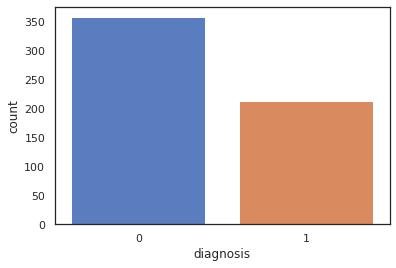

In [252]:
sns.countplot(Y, label =  'Count')
B,M = Y.value_counts()
print('No. of Benign Tumors: ', B)
print('No. of Malignant Tumors: ', M)

Data Visualisation - Violin Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

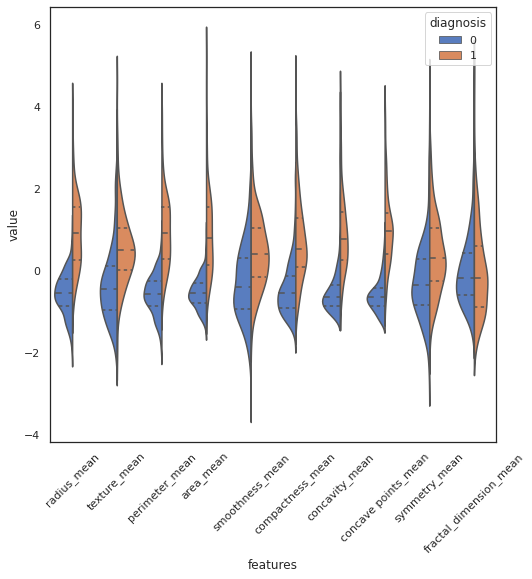

In [253]:
data = X
data_standard = (data - data.mean()) / data.std()
data = pd.concat([Y, data_standard.iloc[:, 0:10]], axis =1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
#print(data)

plt.figure(figsize=(8,8))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

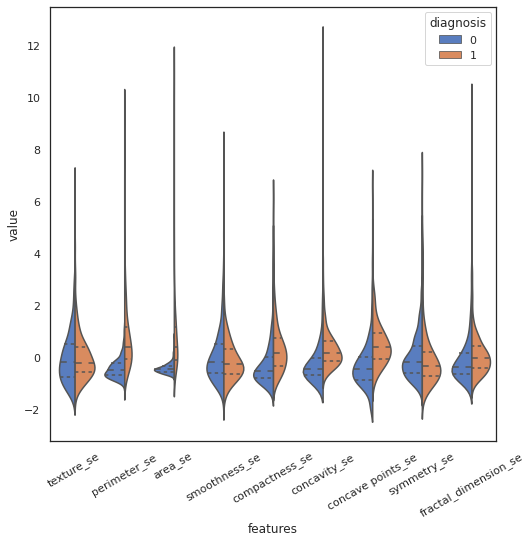

In [254]:
data = X
data_standard = (data - data.mean()) / data.std()
data = pd.concat([Y, data_standard.iloc[:, 11:20]], axis =1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
#print(data)

plt.figure(figsize=(8,8))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

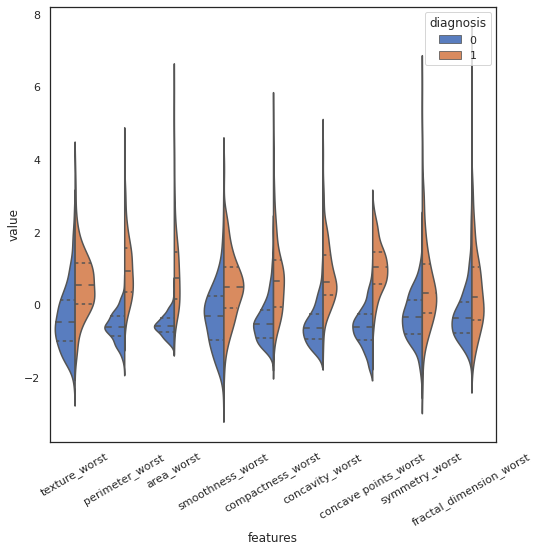

In [255]:
data = X
data_standard = (data - data.mean()) / data.std()
data = pd.concat([Y, data_standard.iloc[:, 21:30]], axis =1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
#print(data)

plt.figure(figsize=(8,8))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 30)

Note: concavity_worst and concave points_worst are highly correlated

Box Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

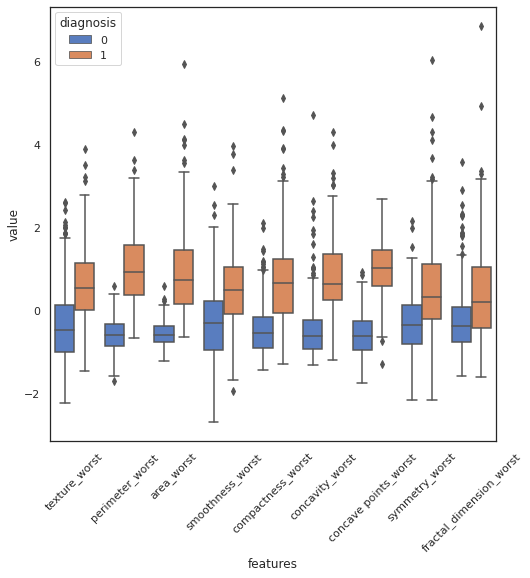

In [256]:

plt.figure(figsize=(8,8))
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

Note: Clear distinction can be observed in Perimeter, Area, Compactness, concavity, concave points

Using Joint Plots for Feature Comparison

In [257]:
import warnings
warnings.filterwarnings("ignore")

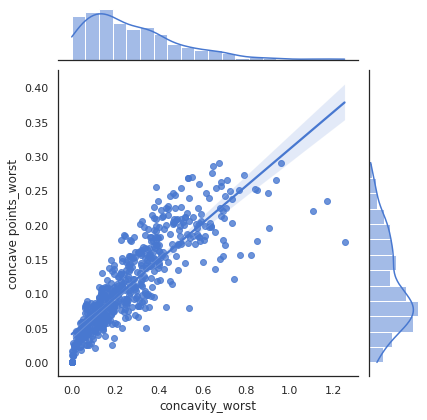

In [258]:

sns.jointplot(X.loc[:, 'concavity_worst'], X.loc[:, 'concave points_worst'], kind = 'reg')


Check the Correlation

In [259]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [260]:
correlation = (X.loc[:,'concavity_worst']).corr(X.loc[:,'concave points_worst'])
print('Correlation between concavity_worst and concave points_worst is: ', correlation)

#Correlation Coefficient = 0.8: A fairly strong positive relationship.
# Correlation Coefficient = 0.6: A moderate positive relationship.

Correlation between concavity_worst and concave points_worst is:  0.8554338603439988


Swarm Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

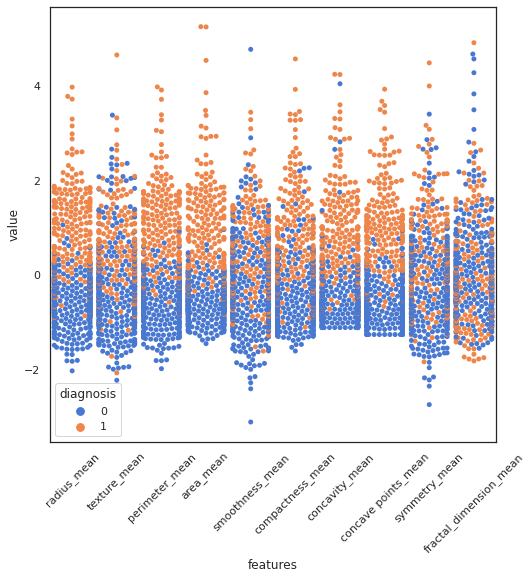

In [261]:
sns.set(style = 'white', palette = 'muted')
data = X
data_standard = (data - data.mean()) / data.std()
data = pd.concat([Y, data_standard.iloc[:, 0:10]], axis =1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
#print(data)

plt.figure(figsize=(8,8))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

Heat Map

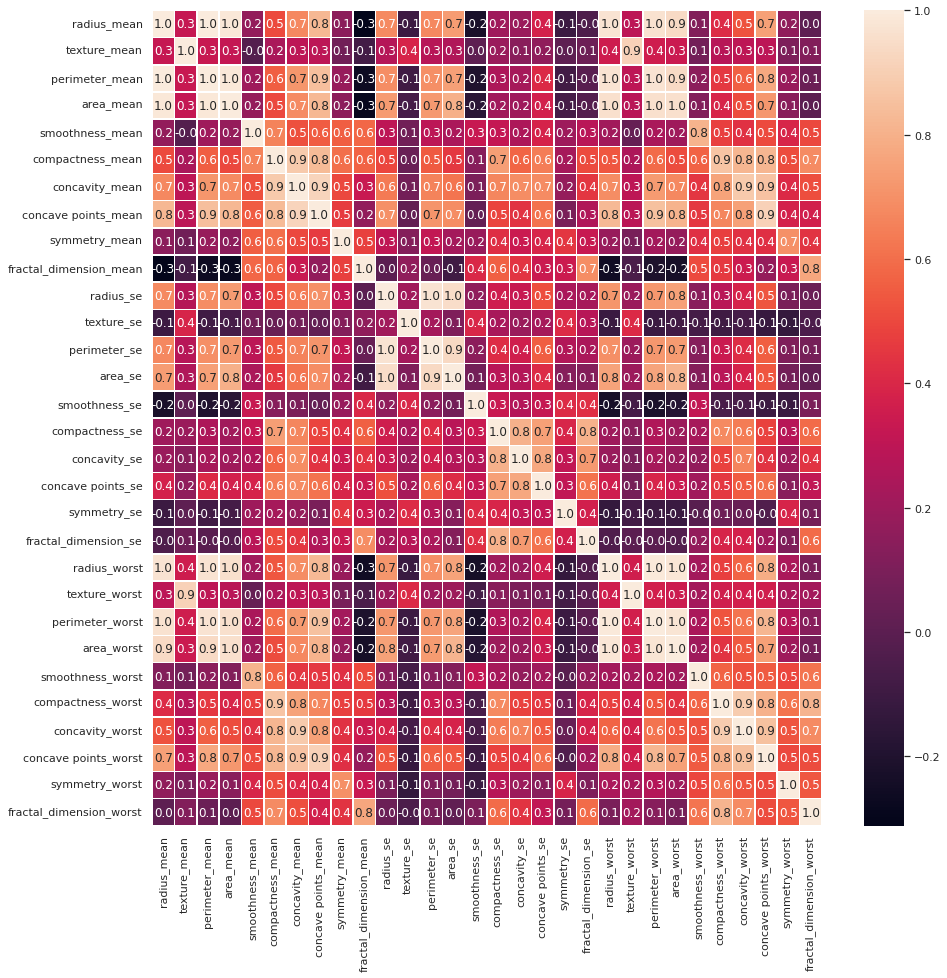

In [262]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(X.corr(), annot = True, linewidth = 0.5, fmt='.1f', ax = ax)

Scale the Data

In [263]:
scale = StandardScaler()
scale = scale.fit(X)
standardised_data = scale.transform(X)
print(standardised_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [264]:
X = standardised_data
print(type(X))

<class 'numpy.ndarray'>


Splitting Data Into Test and Train Data

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state = 2)

In [266]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#Model 1: Logistic Regression 

In [267]:
model = LogisticRegression()


In [268]:
model.fit(X_train, Y_train)

LogisticRegression()

Train Data Evaluation

In [284]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Train data accuracy is: ', '%.5f' % training_data_accuracy)

Train data accuracy is:  0.98901


Test Data Evaluation

In [285]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Test data accuracy is: ', '%.5f' % test_data_accuracy)

Test data accuracy is:  0.96491


Predicting Disease

In [287]:
input_data = (20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)
#print(len(input_data))
input_data_array = np.asarray(input_data)
#print(input_data_array)
input_data_array_reshaped = input_data_array.reshape(1,-1)
#print(input_data_array_reshaped.shape)
standardised_input = scale.transform(input_data_array_reshaped)
#making value 0. Why? Corrective Action? don't use scale.fit but only use scale.transform as it would fit according to previous data
#print(standardised_input)


prediction = model.predict(standardised_input)
#print(prediction)
if prediction == 0:
  print('Bening Tumor')
else:
  print('Malignant Tumor')

Malignant Tumor


# Model 2: SVM Application

In [277]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [286]:

X_train_prediction_SVM = classifier.predict(X_train)
training_data_accuracy_SVM = accuracy_score(X_train_prediction_SVM, Y_train)

print("Accuracy score of training data is: ", '%.5f' % training_data_accuracy_SVM)

Accuracy score of training data is:  0.98901


In [283]:
X_test_prediction_SVM = classifier.predict(X_test)
test_data_accuracy_SVM = accuracy_score(X_test_prediction_SVM, Y_test)
print('Accuracy score of test data is: ', '%.5f' % test_data_accuracy_SVM)

Accuracy score of test data is:  0.97368


Note: Test Accuracy increased by SVM to 0.97368 from 0.96491

#Model 3: Random Forest Classifier 

Fiting in the Model

In [293]:
random_forest = RandomForestClassifier()
model_3 = random_forest.fit(X_train, Y_train)

Prediction

In [296]:
X_train_prediction_3 = model_3.predict(X_train)

Model Evaluation for Train Data

In [298]:
training_data_accuracy_rfc = accuracy_score(X_train_prediction_3, Y_train)

print("Accuracy score of training data is: ", '%.5f' % training_data_accuracy_rfc)

Accuracy score of training data is:  1.00000


Model Evaluation for Test Data

In [300]:
X_test_prediction_rfc = model_3.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
print('Accuracy score of test data is: ', '%.5f' % test_data_accuracy_rfc)

Accuracy score of test data is:  0.95614


# Highest Accuracy on Test Data achieved by SVM out of Logistic Regression, SVM, Random Forest Classifier at 97.368%

# Highest Accuracy on Train Data achieved by Random Forest Classifier out of Logistic Regression, SVM, Random Forest Classifier at 100%